In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets 

In [2]:
customers = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents(1)\Zeotap Assignment\Customers.csv")
products = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents(1)\Zeotap Assignment\Products.csv")
transactions = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents(1)\Zeotap Assignment\Transactions.csv")

In [3]:
print("Customers Dataset:")
print(customers.info())
print(customers.head())

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [4]:
print("\nProducts Dataset:")
print(products.info())
print(products.head())


Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [5]:
print("\nTransactions Dataset:")
print(transactions.info())
print(transactions.head())


Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P06

In [6]:
print("\nMissing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())



Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# Convert date columns to datetime format

In [7]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge datasets

In [8]:
merged_df = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [9]:
print("\nSummary Statistics:")
print(merged_df.describe())


Summary Statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023

# EDA Visualizations

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15904\2944381784.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers, palette='coolwarm', order=customers['Region'].value_counts().index)


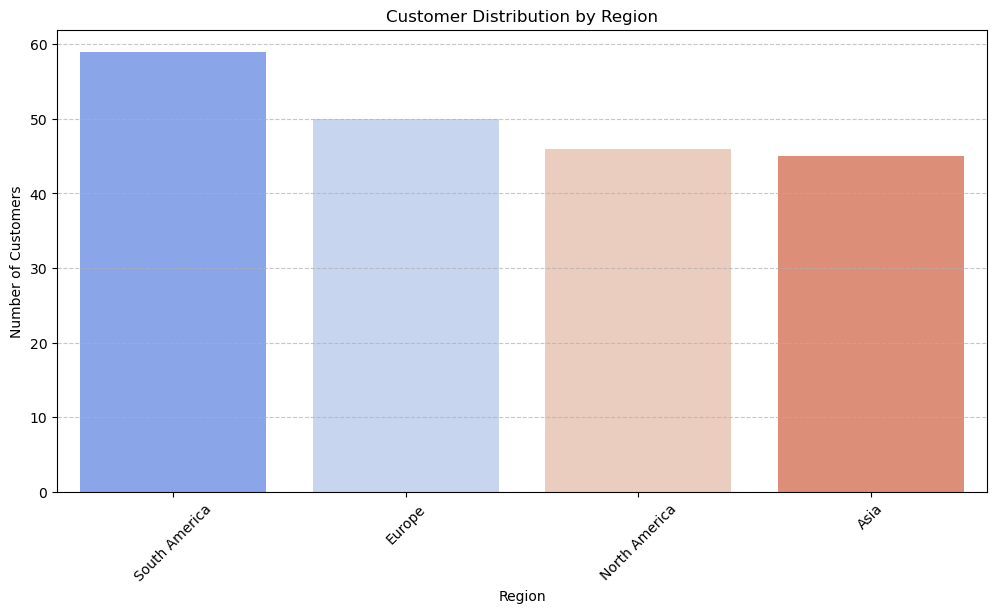

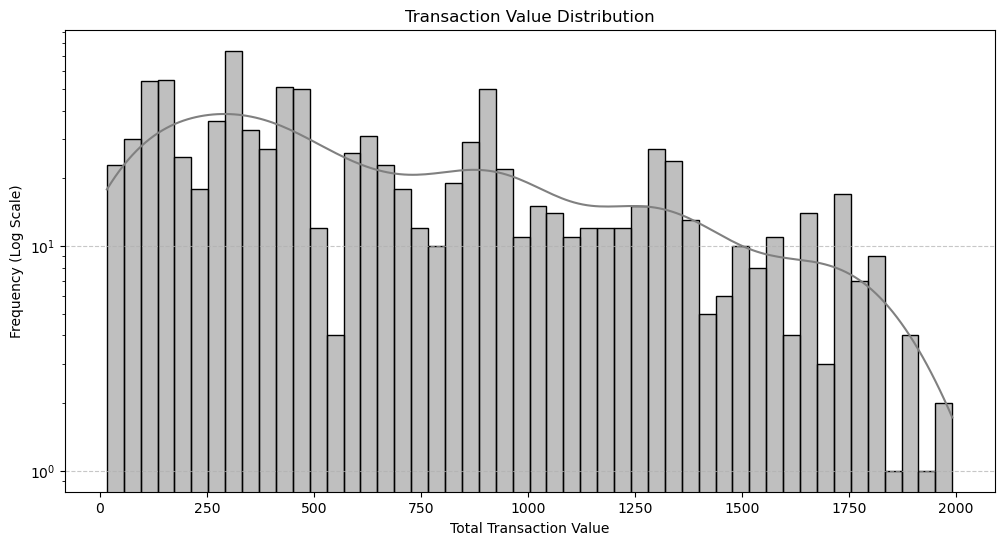

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15904\2944381784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Price', data=products, palette='Set2')


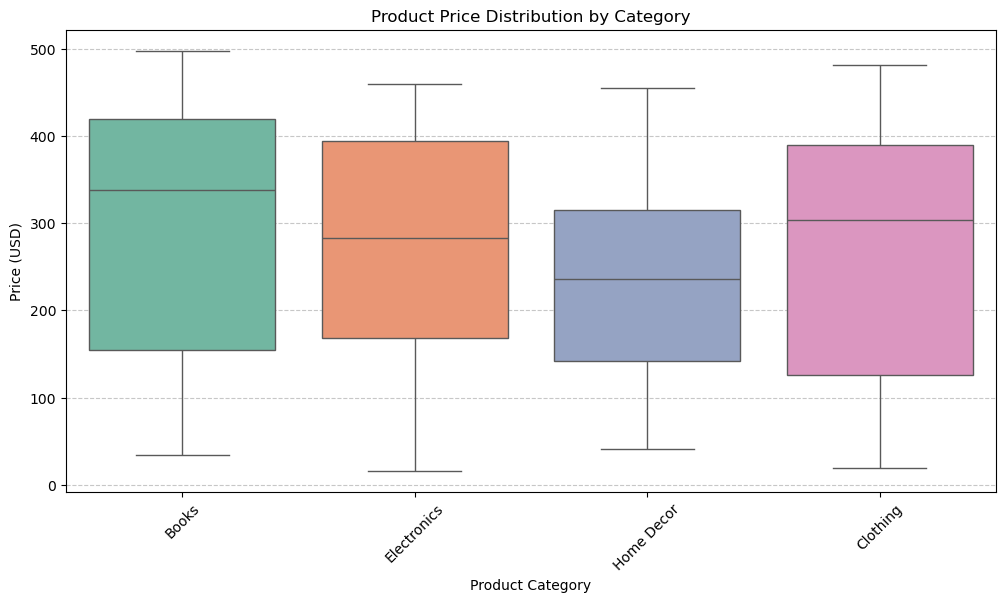

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Region', data=customers, palette='coolwarm', order=customers['Region'].value_counts().index)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(merged_df['TotalValue'], bins=50, kde=True, color='grey')
plt.yscale("log") 
plt.title('Transaction Value Distribution')
plt.xlabel('Total Transaction Value')
plt.ylabel('Frequency (Log Scale)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=products, palette='Set2')
plt.xticks(rotation=45)
plt.title('Product Price Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
best_sellers = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Best-Selling Products:")
print(best_sellers)


Top 5 Best-Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15904\2459671221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_sellers.index, y=best_sellers.values, palette='viridis')


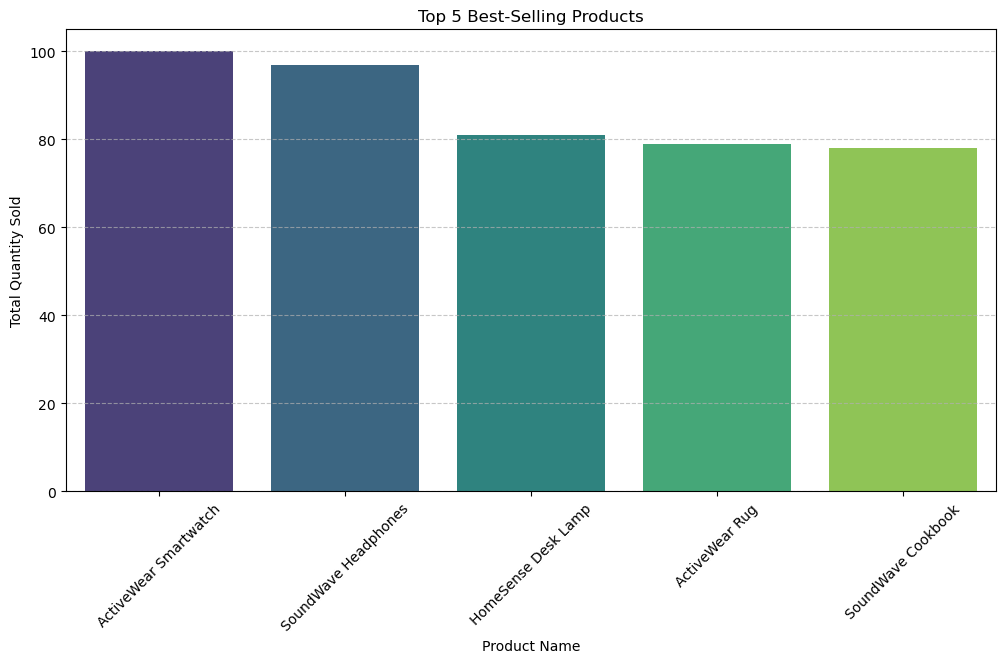

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x=best_sellers.index, y=best_sellers.values, palette='viridis')
plt.title('Top 5 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Customer Signup Trend Analysis

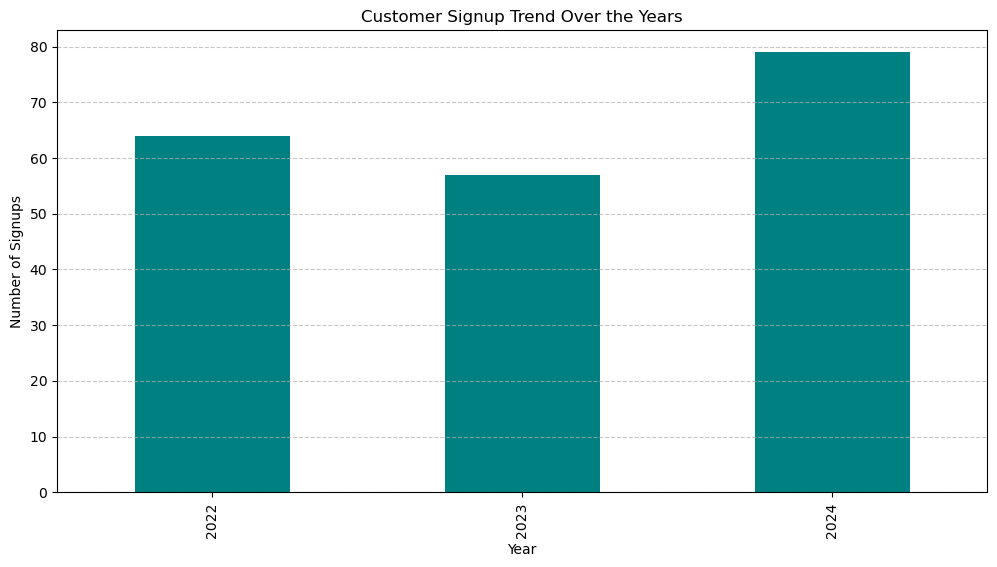

In [15]:
plt.figure(figsize=(12, 6))
customers['SignupDate'].dt.year.value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Customer Signup Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Business Insights

In [13]:
insights = [
    "1. The majority of customers are from a specific region, indicating a potential market focus.",
    "2. The transaction value distribution shows a right-skewed pattern, suggesting some high-value transactions.",
    "3. Some product categories have a significantly higher price range, which could influence purchasing behavior.",
    "4. Certain products are consistently best-sellers, highlighting key revenue drivers.",
    "5. The seasonal variation in transaction dates might indicate peak shopping periods."
]

print("\nBusiness Insights:")
for insight in insights:
    print(insight)


Business Insights:
1. The majority of customers are from a specific region, indicating a potential market focus.
2. The transaction value distribution shows a right-skewed pattern, suggesting some high-value transactions.
3. Some product categories have a significantly higher price range, which could influence purchasing behavior.
4. Certain products are consistently best-sellers, highlighting key revenue drivers.
5. The seasonal variation in transaction dates might indicate peak shopping periods.
